In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
boston = fetch_openml(data_id=531, parser= 'auto')

In [6]:
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
x = df
y= boston.target

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
x= df['LSTAT'].values.reshape(-1,1)

In [10]:
tree = DecisionTreeRegressor(max_depth=5)

In [11]:
tree.fit(x,y)

DecisionTreeRegressor(max_depth=5)

In [12]:
sort_id = x.flatten().argsort()

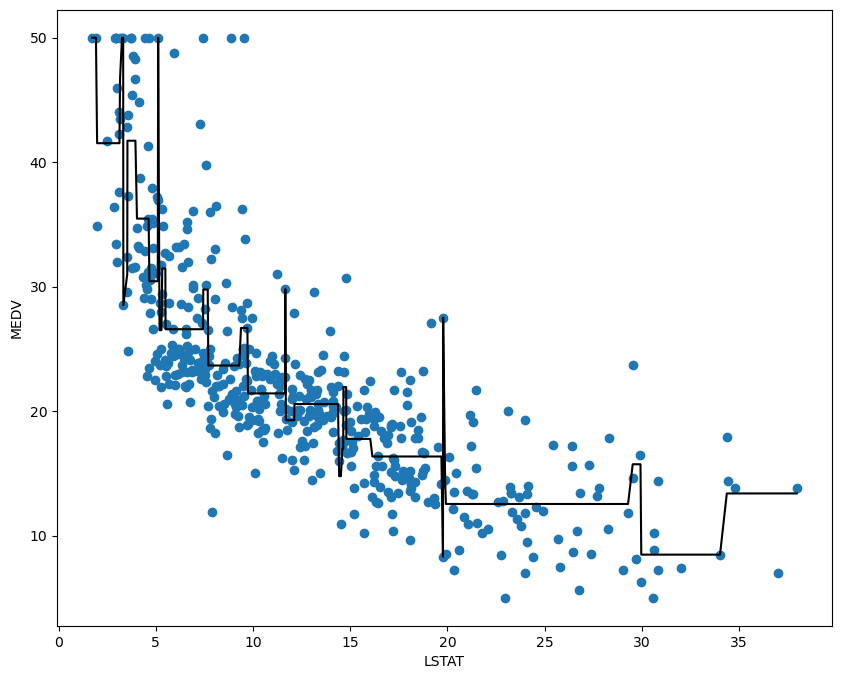

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_id], y[sort_id])
plt.plot(x[sort_id], tree.predict(x[sort_id]), c='k')
plt.xlabel('LSTAT')
plt.ylabel("MEDV")
plt.show()

In [14]:
# trying with another fitting
tree = DecisionTreeRegressor(max_depth=2)

In [15]:
tree.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [16]:
sort_id = x.flatten().argsort()

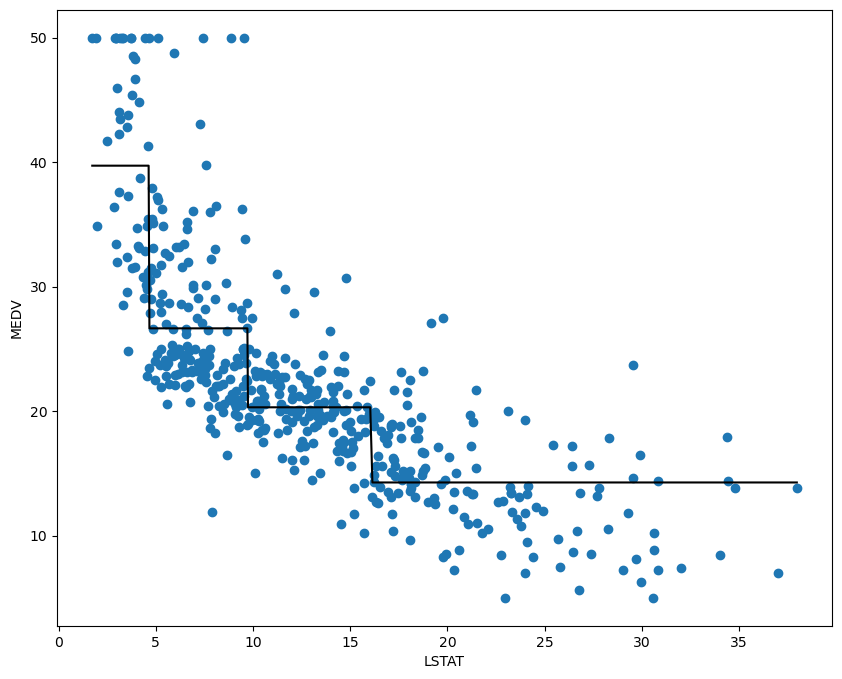

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_id], y[sort_id])
plt.plot(x[sort_id], tree.predict(x[sort_id]), c='k')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

## Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
x = df.values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state= 42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
forest = RandomForestRegressor(n_estimators= 500, criterion='friedman_mse', random_state=42, n_jobs=-1)

In [23]:
forest.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=500, n_jobs=-1,
                      random_state=42)

In [24]:
y_train_pred = forest.predict(x_train)

In [25]:
y_test_pred = forest.predict(x_test)

In [26]:
print("MSE train: {0:,.4f} test: {1:,.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8662 test: 9.4416


In [27]:
print("R^2 train: {0:,.4f} test: {1:,.4f}".\
     format(r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))

R^2 train: 0.9788 test: 0.8733


## AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostRegressor

In [29]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)

In [30]:
ada.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [31]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [32]:
print("MSE train: {0:,.4f}  test: {1:,.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

MSE train: 4.4567  test: 13.2427


In [33]:
print("R^2 train: {0:.4f}  test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))

R^2 train: 0.9493  test: 0.8223


## Feature Importances

In [34]:
ada.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
result= pd.DataFrame(ada.feature_importances_, df.columns)
result.columns= ['features']

In [37]:
result.sort_values(by='features' , ascending=False)

,features
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


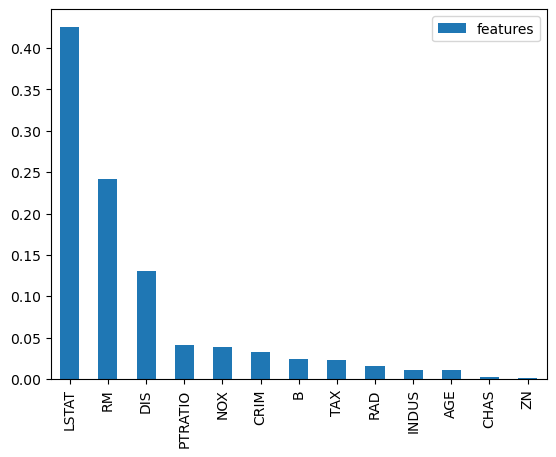

In [38]:
result.sort_values(by='features' , ascending=False).plot(kind='bar')
plt.show()

In [39]:
# b random forest
forest.feature_importances_

array([0.03166104, 0.00161399, 0.00695387, 0.00138063, 0.01428235,
       0.40322336, 0.01405554, 0.06317186, 0.00547154, 0.01210623,
       0.01875015, 0.01302814, 0.41430131])

In [40]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [41]:
result= pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']

<Axes: >

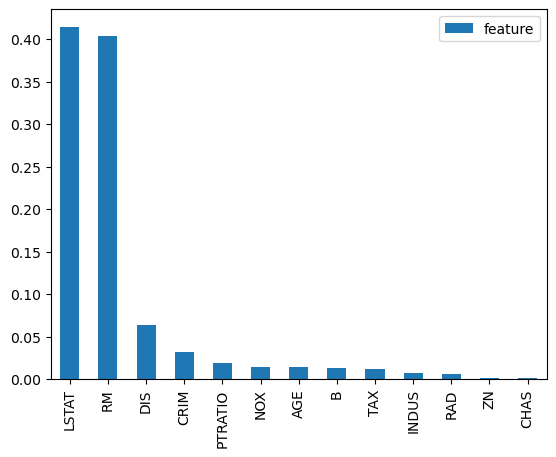

In [42]:
result.sort_values(by='feature' , ascending=False).plot(kind='bar')

In [43]:
# by decision tree regressor
tree= DecisionTreeRegressor(max_depth=3)

In [44]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [46]:
print("MSE train: {0:,.4f}  test: {1:,.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

MSE train: 15.3680  test: 19.1073


In [48]:
print("R^2 train: {0:,.4f}  test: {1:,.4f}".\
     format(r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))

R^2 train: 0.8252  test: 0.7436


In [ ]:
tree.feature_importances_

<Axes: >

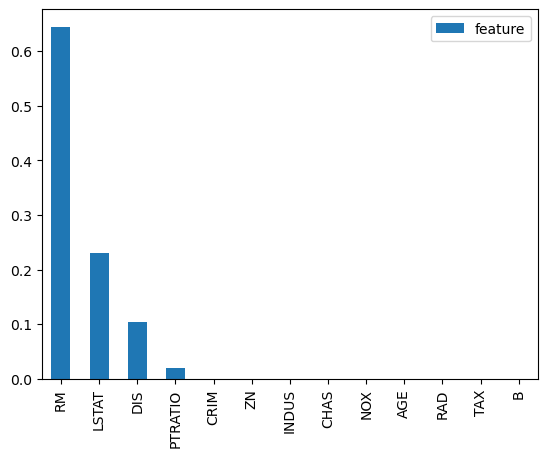

In [49]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature' , ascending=False).plot(kind='bar')